## Data Preprocessing and Setup

In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyale


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm keras prophet shap pyale


In [10]:
!pip install keras-tcn tensorflow

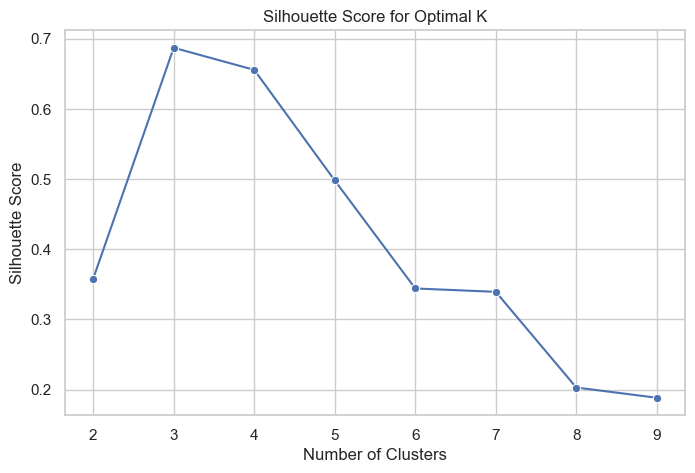

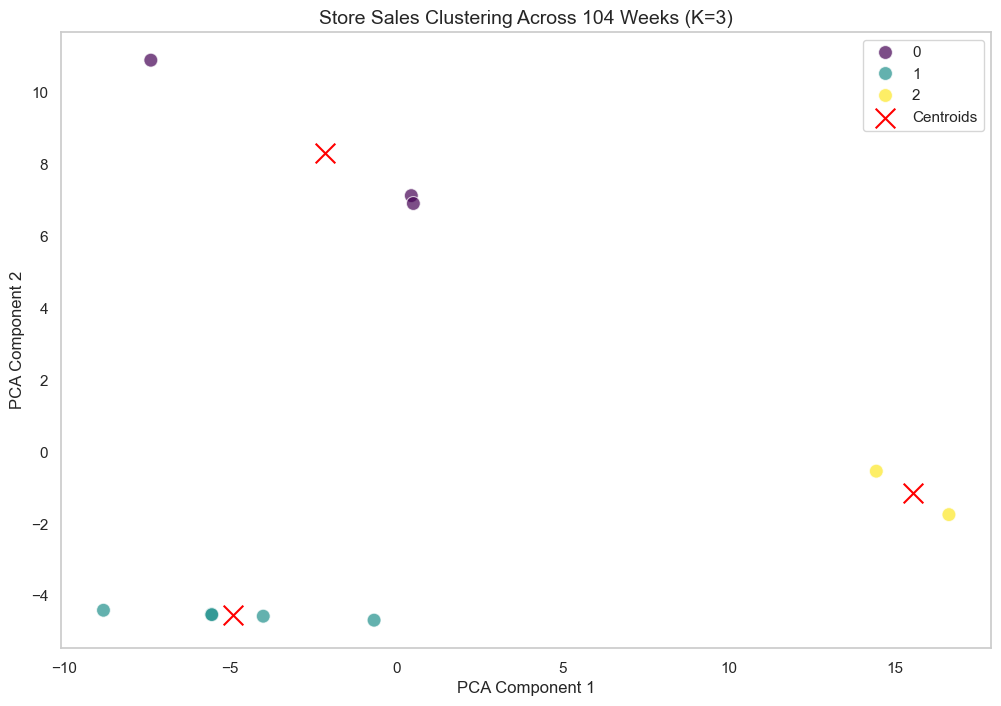

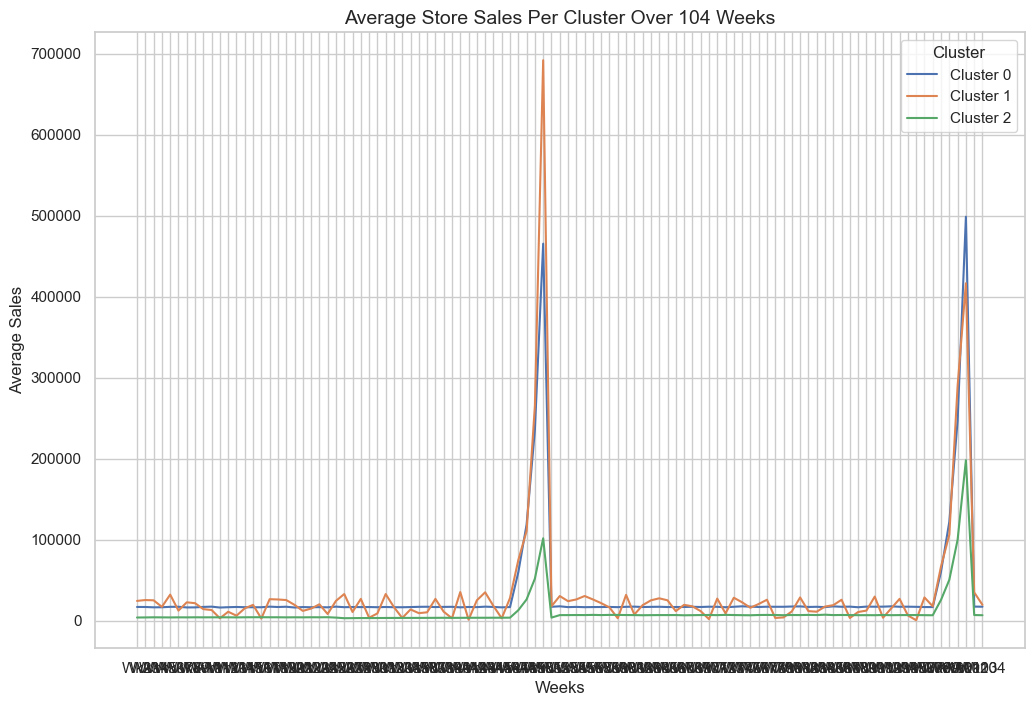

Clustering Summary:
                  Wk2        Wk3           Wk4           Wk5           Wk6  \
Cluster                                                                      
0        16794.333333  16765.000  16359.333333  16426.666667  16936.333333   
1        24276.312000  25331.616  25008.576000  16907.976000  32029.032000   
2         3762.000000   3851.000   4015.500000   3930.000000   3857.500000   

                  Wk7           Wk8           Wk9          Wk10       Wk11  \
Cluster                                                                      
0        17027.333333  16212.333333  16283.666667  16852.333333  17175.000   
1        12319.224000  22526.328000  21466.920000  14094.480000  13018.008   
2         3966.500000   3931.000000   4017.000000   3980.500000   4002.000   

         ...          Wk95       Wk96       Wk97          Wk98          Wk99  \
Cluster  ...                                                                   
0        ...  17128.333333  16955.000 

'\nPCA1 and PCA2 are the first two principal components obtained using Principal Component Analysis (PCA).\nPCA is used to reduce the dimensionality of the data, meaning it transforms the original high-dimensional data\n(sales across 104 weeks) into two principal components (PCA1 and PCA2) that capture the maximum variance in the data.\n\nPCA1 (Principal Component 1) represents the direction in which the data varies the most, while PCA2 (Principal Component 2)\nis the direction of the second highest variance orthogonal to PCA1. Together, PCA1 and PCA2 provide a 2D projection of the\noriginal sales data, allowing us to visualize the clusters in a lower-dimensional space.\n'

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set a trendy style using seaborn
sns.set(style="whitegrid")

# Load the dataset
file_path = '/Users/naveenganta/Desktop/analytics/Projects/RFP/product data for clustering.xlsx'
df = pd.read_excel(file_path)

# Step 1: Group sales data by store
store_sales = df.groupby('Store_name').sum().iloc[:, 4:108]  # Sales for weeks Wk1 to Wk104

# Step 2: Standardize the sales data
scaler = StandardScaler()
store_sales_scaled = scaler.fit_transform(store_sales)

# Step 3: Silhouette Method to find the optimal number of clusters
def silhouette_method(data, max_k=10):
    silhouette_scores = []
    for k in range(2, min(max_k+1, data.shape[0])):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
    
    # Plotting silhouette scores
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=range(2, min(max_k+1, data.shape[0])), y=silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Return the optimal number of clusters
    return np.argmax(silhouette_scores) + 2

# Step 4: Apply Silhouette Method to get the optimal K
optimal_k_store = silhouette_method(store_sales_scaled)

# Step 5: Apply KMeans with optimal K
if optimal_k_store is not None:
    kmeans_store = KMeans(n_clusters=optimal_k_store, random_state=42)
    store_clusters = kmeans_store.fit_predict(store_sales_scaled)

    # Add cluster labels to the store sales data
    store_sales['Cluster'] = store_clusters

    # PCA for dimensionality reduction to 2 components
    pca = PCA(n_components=2)
    store_sales_pca = pca.fit_transform(store_sales_scaled)

    # Create a DataFrame for the PCA results
    store_sales['PCA1'] = store_sales_pca[:, 0]
    store_sales['PCA2'] = store_sales_pca[:, 1]

    # Step 6: Visualize the clustering with trendy scatter plot and centroids
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=store_sales, s=100, alpha=0.7)
    
    # Plot centroids
    centroids_store = pca.transform(kmeans_store.cluster_centers_)
    plt.scatter(centroids_store[:, 0], centroids_store[:, 1], color='red', s=200, marker='x', label='Centroids')
    
    plt.title(f'Store Sales Clustering Across 104 Weeks (K={optimal_k_store})', fontsize=14)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(False)
    plt.show()

    # Step 7: Plot average store sales per cluster over the weeks
    # Group by clusters and calculate average sales per cluster for each week
    store_sales_by_cluster = store_sales.groupby('Cluster').mean().iloc[:, :-2]  # Exclude PCA1 and PCA2 columns

    plt.figure(figsize=(12, 8))
    for cluster in store_sales_by_cluster.index:
        plt.plot(store_sales_by_cluster.columns, store_sales_by_cluster.loc[cluster], label=f'Cluster {cluster}')
    
    plt.title('Average Store Sales Per Cluster Over 104 Weeks', fontsize=14)
    plt.xlabel('Weeks')
    plt.ylabel('Average Sales')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    # Step 8: Print the clustering summary
    print("Clustering Summary:")
    cluster_summary = store_sales.groupby('Cluster').mean().iloc[:, :-2]  # Excluding PCA1, PCA2
    print(cluster_summary)

    # Step 9: Print which store belongs to which cluster
    store_cluster_mapping = store_sales[['Cluster']]
    print("\nStore to Cluster Mapping:")
    print(store_cluster_mapping)

# Explanation of PCA1 and PCA2:
"""
PCA1 and PCA2 are the first two principal components obtained using Principal Component Analysis (PCA).
PCA is used to reduce the dimensionality of the data, meaning it transforms the original high-dimensional data
(sales across 104 weeks) into two principal components (PCA1 and PCA2) that capture the maximum variance in the data.

PCA1 (Principal Component 1) represents the direction in which the data varies the most, while PCA2 (Principal Component 2)
is the direction of the second highest variance orthogonal to PCA1. Together, PCA1 and PCA2 provide a 2D projection of the
original sales data, allowing us to visualize the clusters in a lower-dimensional space.
"""


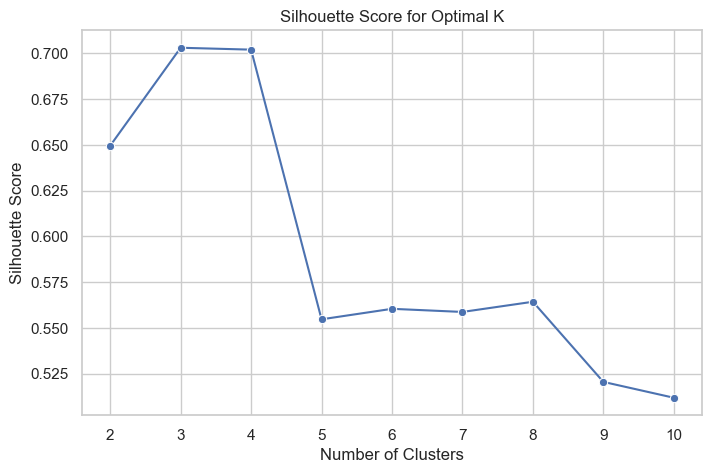

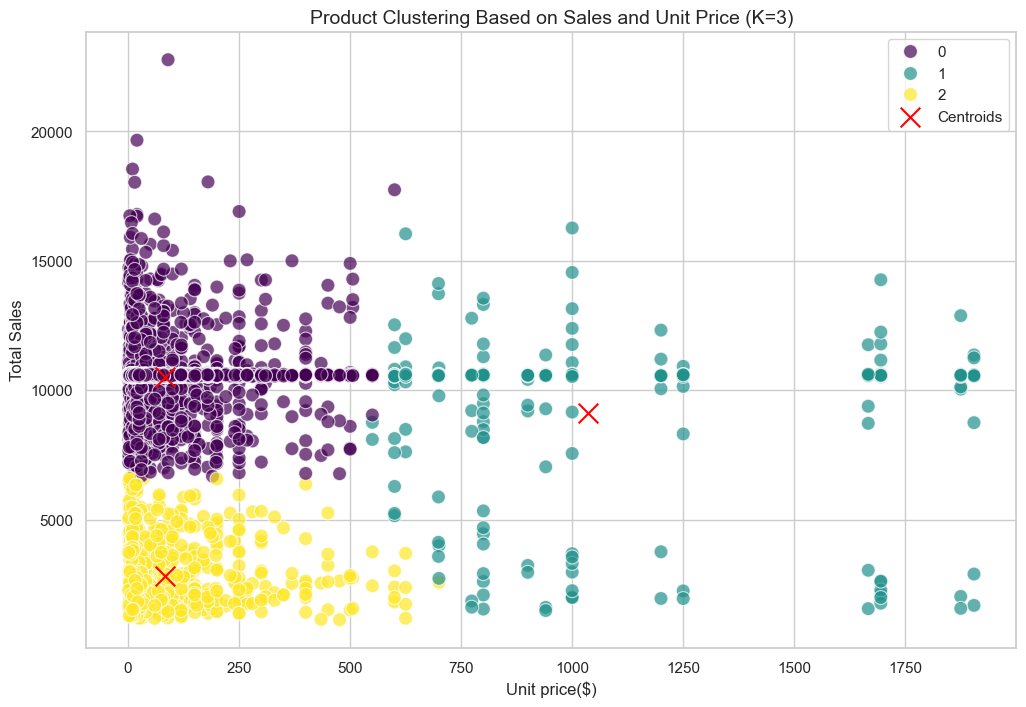


Product to Cluster Mapping:
             Product Name  Product Cluster
0     Moisturizing Lotion                2
1         Shampoo (500ml)                2
2       Face Wash (150ml)                2
3         Lip Balm (4.8g)                2
4        Deodorant (75ml)                2
...                   ...              ...
3555                  Hat                0
3556               Gloves                0
3557              Pajamas                0
3558             Swimwear                0
3559                 Belt                0

[3560 rows x 2 columns]


In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set a trendy style using seaborn
sns.set(style="whitegrid")

# Load the dataset
file_path = '/Users/naveenganta/Desktop/analytics/Projects/RFP/product data for clustering.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate total sales for each product across 104 weeks
df['Total Sales'] = df.iloc[:, 4:108].sum(axis=1)

# Step 2: Select the columns for clustering (Unit price and Total Sales)
product_clustering_data = df[['Unit price($)', 'Total Sales']]

# Step 3: Standardize the data
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_clustering_data)

# Step 4: Silhouette Method to find the optimal number of clusters
def silhouette_method(data, max_k=10):
    silhouette_scores = []
    for k in range(2, min(max_k+1, data.shape[0])):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
    
    # Plotting silhouette scores
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=range(2, min(max_k+1, data.shape[0])), y=silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Return the optimal number of clusters
    return np.argmax(silhouette_scores) + 2

# Step 5: Apply Silhouette Method to get the optimal K
optimal_k_product = silhouette_method(product_data_scaled)

# Step 6: Apply KMeans with optimal K
if optimal_k_product is not None:
    kmeans_product = KMeans(n_clusters=optimal_k_product, random_state=42)
    product_clusters = kmeans_product.fit_predict(product_data_scaled)

    # Add cluster labels to the original dataframe
    df['Product Cluster'] = product_clusters

    # Step 7: Visualize the clustering with scatter plot and centroids
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(x='Unit price($)', y='Total Sales', hue='Product Cluster', palette='viridis', data=df, s=100, alpha=0.7)
    
    # Plot centroids
    centroids_product = scaler.inverse_transform(kmeans_product.cluster_centers_)  # Inverse transform to original scale
    plt.scatter(centroids_product[:, 0], centroids_product[:, 1], color='red', s=200, marker='x', label='Centroids')
    
    plt.title(f'Product Clustering Based on Sales and Unit Price (K={optimal_k_product})', fontsize=14)
    plt.xlabel('Unit price($)')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 8: Print which product belongs to which cluster
    product_cluster_mapping = df[['Product Name', 'Product Cluster']]
    print("\nProduct to Cluster Mapping:")
    print(product_cluster_mapping)



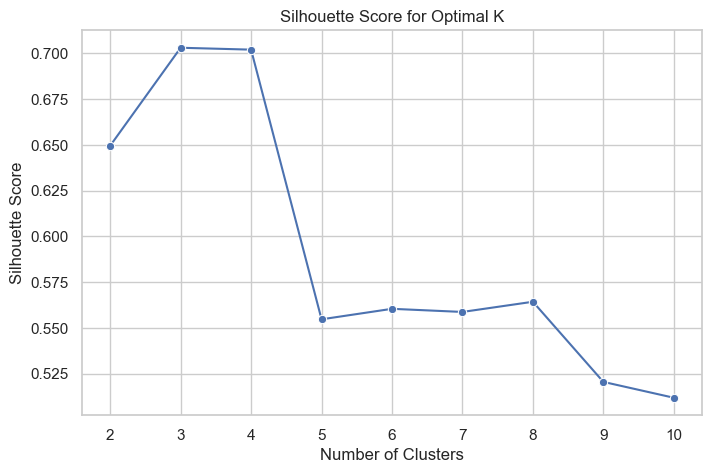

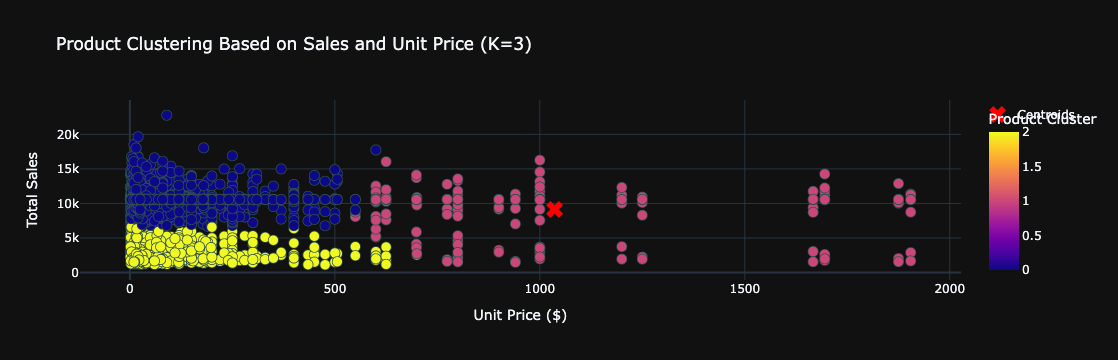


Product to Cluster Mapping:
             Product Name  Product Cluster
0     Moisturizing Lotion                2
1         Shampoo (500ml)                2
2       Face Wash (150ml)                2
3         Lip Balm (4.8g)                2
4        Deodorant (75ml)                2
...                   ...              ...
3555                  Hat                0
3556               Gloves                0
3557              Pajamas                0
3558             Swimwear                0
3559                 Belt                0

[3560 rows x 2 columns]


In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objs as go  # To customize traces like centroids

# Load the dataset
file_path = '/Users/naveenganta/Desktop/analytics/Projects/RFP/product data for clustering.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate total sales for each product across 104 weeks
df['Total Sales'] = df.iloc[:, 4:108].sum(axis=1)

# Step 2: Select the columns for clustering (Unit price and Total Sales)
product_clustering_data = df[['Unit price($)', 'Total Sales']]

# Step 3: Standardize the data
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_clustering_data)

# Step 4: Silhouette Method to find the optimal number of clusters
def silhouette_method(data, max_k=10):
    silhouette_scores = []
    for k in range(2, min(max_k+1, data.shape[0])):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(data, labels)
            silhouette_scores.append(score)
    
    # Plotting silhouette scores
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=range(2, min(max_k+1, data.shape[0])), y=silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Return the optimal number of clusters
    return np.argmax(silhouette_scores) + 2

# Step 5: Apply Silhouette Method to get the optimal K
optimal_k_product = silhouette_method(product_data_scaled)

# Step 6: Apply KMeans with optimal K
if optimal_k_product is not None:
    kmeans_product = KMeans(n_clusters=optimal_k_product, random_state=42)
    product_clusters = kmeans_product.fit_predict(product_data_scaled)

    # Add cluster labels to the original dataframe
    df['Product Cluster'] = product_clusters

    # Step 7: Visualize the clustering using Plotly with Hover Data
    # Create the plot
    fig = px.scatter(df, x='Unit price($)', y='Total Sales', color='Product Cluster',
                     hover_data=['Product Name'],  # Show product names on hover
                     title=f'Product Clustering Based on Sales and Unit Price (K={optimal_k_product})',
                     labels={'Unit price($)': 'Unit Price ($)', 'Total Sales': 'Total Sales'},
                     template='plotly_dark')

    # Customize marker sizes and style
    fig.update_traces(marker=dict(size=10, opacity=1, line=dict(width=0.7, color='DarkSlateGrey')))

    # Plot centroids using plotly.graph_objs for more control
    centroids_product = scaler.inverse_transform(kmeans_product.cluster_centers_)
    centroid_trace = go.Scatter(
        x=centroids_product[:, 0], 
        y=centroids_product[:, 1], 
        mode='markers', 
        marker=dict(size=15, color='red', symbol='x'), 
        name='Centroids'
    )

    fig.add_trace(centroid_trace)

    # Show the plot
    fig.show()

    # Step 8: Print which product belongs to which cluster
    product_cluster_mapping = df[['Product Name', 'Product Cluster']]
    print("\nProduct to Cluster Mapping:")
    print(product_cluster_mapping)


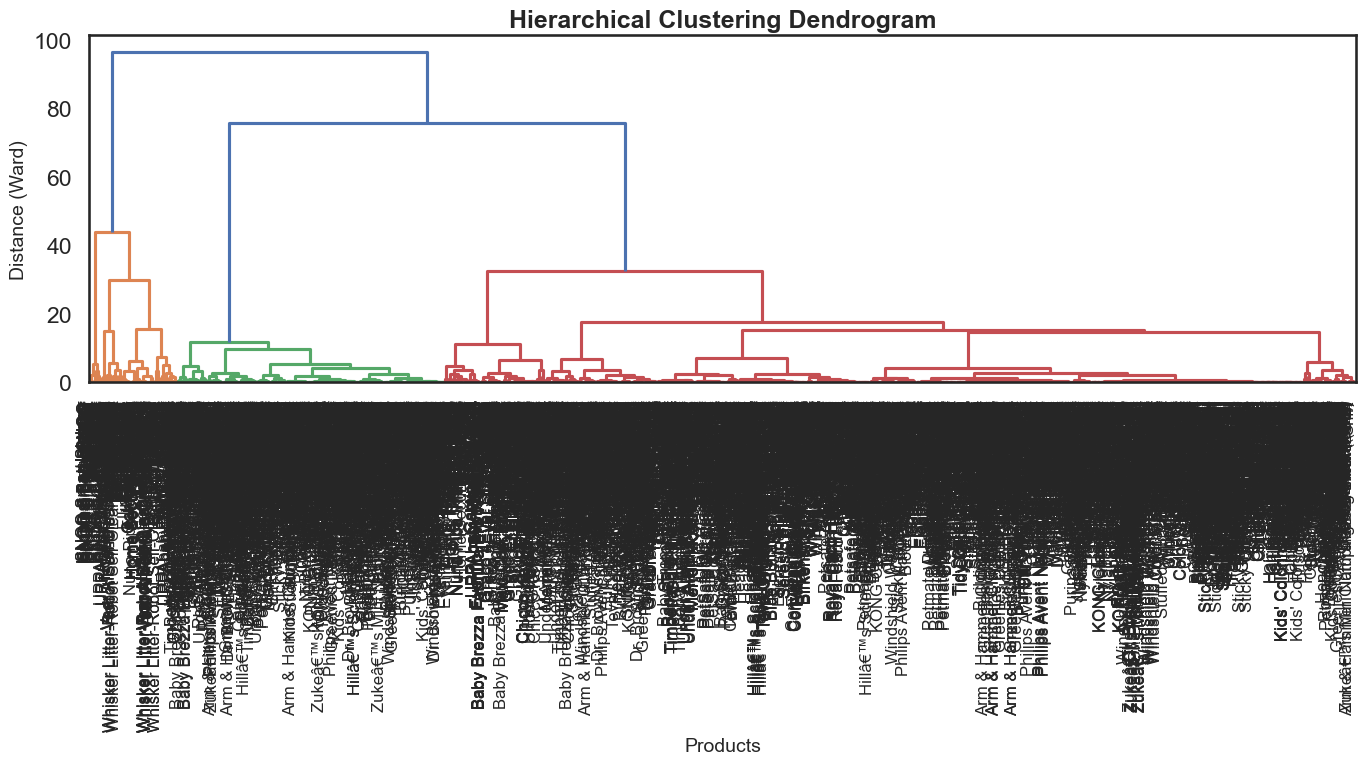

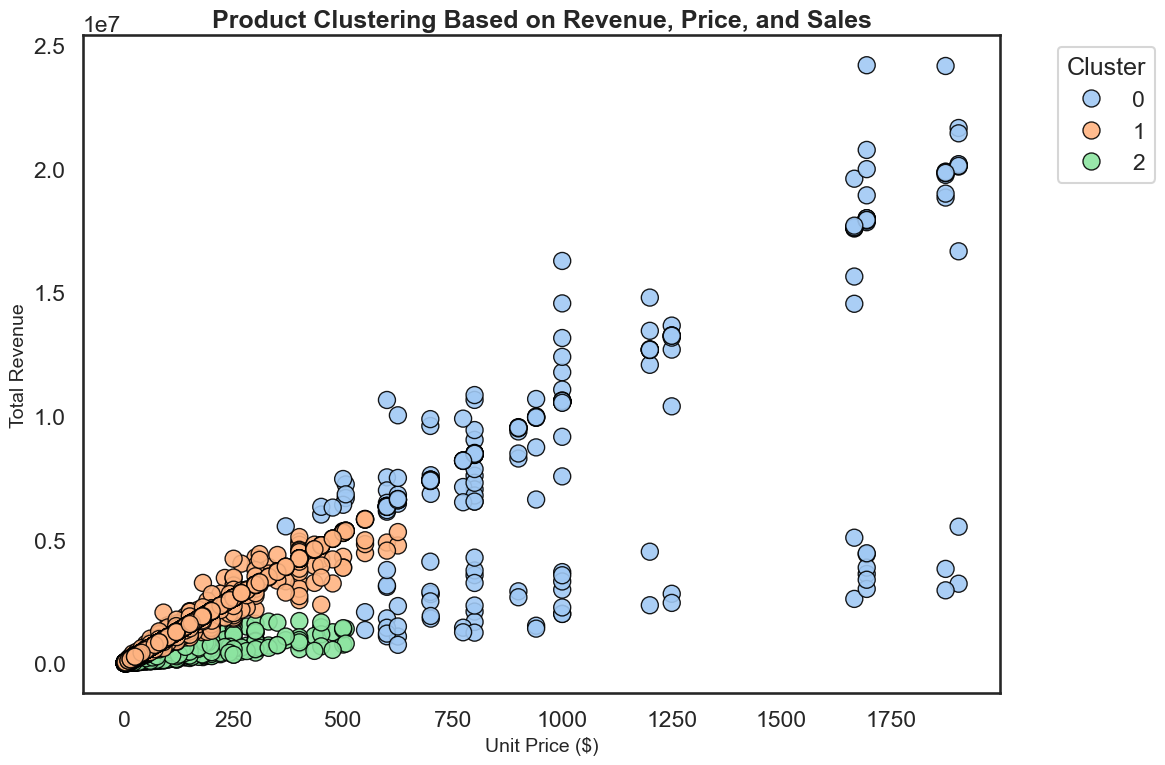


Products in Each Cluster:

Cluster 2:
['Moisturizing Lotion' 'Shampoo (500ml)' 'Face Wash (150ml)'
 'Lip Balm (4.8g)' 'Deodorant (75ml)' 'Sunscreen (100ml)'
 'Makeup Remover (200ml)' 'Toothpaste (100g)' 'Hand Cream (50ml)'
 'Hair Serum (100ml)' 'Nail Polish (10ml)' 'Bath Soap (125g)' 'Hairbrush'
 'Notebook (200 pages)' 'Sketchbook (A4)' 'Color Markers (12 pack)'
 'Highlighter (4 pack)' 'Sticky Notes (100 sheets)' 'Graph Paper Notebook'
 'Mathematics Textbook' "Children's Picture Book" 'Eraser (pack of 4)'
 'Binder Clips (pack of 12)' 'Glue Stick (pack of 3)' 'Ruler (30cm)'
 'Fountain Pen' 'Pocket Dictionary' 'Bookmark (magnetic)'
 'Baby Brezza Formula Pro WiFi Dispenser'
 "Dr. Brown's Formula Mixing Pitcher" 'Graco 4Ever DLX Car Seat'
 'Chicco KeyFit 35 Infant Car Seat' 'Baby Bjorn Carrier'
 'Philips Avent Natural Bottles (3-pack)' 'Halo Bassinest'
 'Skip Hop Diaper Bag' 'Ergobaby Carrier' 'Maxi-Cosi Mico XP Car Seat'
 'UPPAbaby Mesa Car Seat' 'Graco SnugRide SnugFit 35'
 'Evenflo Piv

In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Set modern, minimalistic style with seaborn
sns.set(style="white", context="talk")

# Load the dataset
file_path = '/Users/naveenganta/Desktop/analytics/Projects/RFP/product data for clustering.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate total sales for each product across 104 weeks
df['Total Sales'] = df.iloc[:, 4:108].sum(axis=1)

# Step 2: Calculate total revenue for each product (Unit price * Total Sales)
df['Total Revenue'] = df['Unit price($)'] * df['Total Sales']

# Step 3: Select relevant features (Total Revenue, Unit price, and Total Sales)
product_clustering_data = df[['Total Revenue', 'Unit price($)', 'Total Sales']]

# Step 4: Standardize the data
scaler = StandardScaler()
product_data_scaled = scaler.fit_transform(product_clustering_data)

# Step 5: Apply Agglomerative Clustering for dendrogram
linked = linkage(product_data_scaled, method='ward')

# Step 6: Plot Dendrogram with modern, minimalistic styling
plt.figure(figsize=(14, 8))
dendrogram(linked, labels=df['Product Name'].values, leaf_rotation=90, leaf_font_size=10, color_threshold=0.7*max(linked[:, 2]))

# Modern styling
plt.title('Hierarchical Clustering Dendrogram', fontsize=18, weight='bold')
plt.xlabel('Products', fontsize=14)
plt.ylabel('Distance (Ward)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 7: Apply Agglomerative Clustering with a set number of clusters (e.g., 3 clusters)
agg_clustering_final = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Revenue Cluster'] = agg_clustering_final.fit_predict(product_data_scaled)

# Step 8: Visualize clusters using a modern, sleek 2D scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Unit price($)', y='Total Revenue', hue='Revenue Cluster', palette='pastel', data=df, s=150, edgecolor='black', alpha=0.9)

# Modern, sleek scatter plot styling
plt.title('Product Clustering Based on Revenue, Price, and Sales', fontsize=18, weight='bold')
plt.xlabel('Unit Price ($)', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 9: Show products cluster-wise
print("\nProducts in Each Cluster:")
for cluster in df['Revenue Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Revenue Cluster'] == cluster]['Product Name'].values)


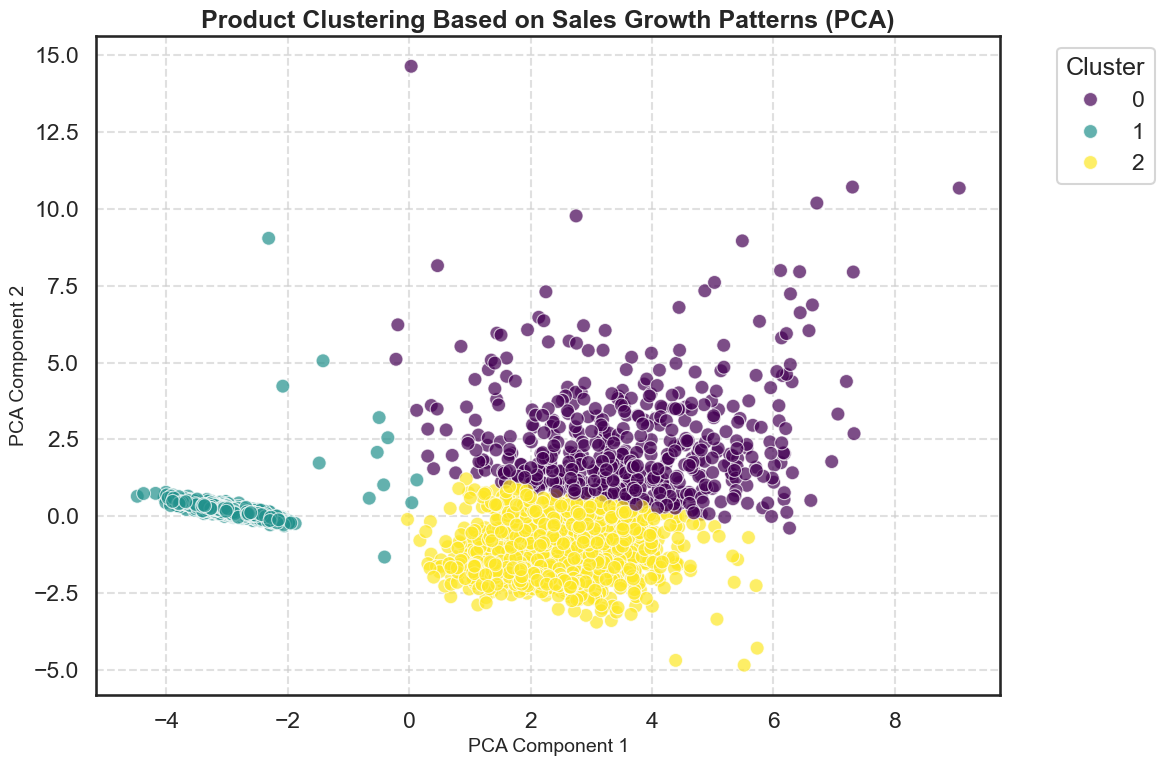

PCA1 explains 8.44% of the variance in the data.
PCA2 explains 2.06% of the variance in the data.


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Set modern, minimalistic style
sns.set(style="white", context="talk")

# Load the dataset
file_path = '/Users/naveenganta/Desktop/analytics/Projects/RFP/product data for clustering.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate week-over-week percentage change in sales (Sales Growth)
sales_columns = df.columns[4:108]  # Assuming Wk1 to Wk104 are in columns 4 to 108
df_growth = df[sales_columns].pct_change(axis=1).replace([np.inf, -np.inf], 0).fillna(0)

# Step 2: Standardize the sales growth data
scaler = StandardScaler()
sales_growth_scaled = scaler.fit_transform(df_growth)

# Step 3: Reduce dimensionality using PCA (to 2 components)
pca = PCA(n_components=2)
sales_growth_pca = pca.fit_transform(sales_growth_scaled)

# Step 4: Apply KMeans Clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
df['Growth Cluster'] = kmeans.fit_predict(sales_growth_pca)

# Step 5: Plot the clusters in the reduced PCA space
plt.figure(figsize=(12, 8))
sns.scatterplot(x=sales_growth_pca[:, 0], y=sales_growth_pca[:, 1], hue=df['Growth Cluster'], palette='viridis', s=100, alpha=0.7)

# Modern, clean plot styling
plt.title('Product Clustering Based on Sales Growth Patterns (PCA)', fontsize=18, weight='bold')
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 6: Explanation of PCA1 and PCA2
explained_variance = pca.explained_variance_ratio_
print(f'PCA1 explains {explained_variance[0] * 100:.2f}% of the variance in the data.')
print(f'PCA2 explains {explained_variance[1] * 100:.2f}% of the variance in the data.')


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tcn import TCN
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path ="/Users/naveenganta/Desktop/analytics/Projects/RFP/Walmart Final Dataset.xlsx"
data = pd.read_excel(file_path)

# Convert 'Date' column to datetime and extract necessary time-based features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Define features (X) and target (y)
X = data.drop(['Weekly_Sales', 'Date'], axis=1)
y = data['Weekly_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the features (for models like LSTM and TCN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  Model Training, Evaluation, and Feature Importance
Each model will follow the structure:

Model Training and Evaluation.
Actual vs Predicted Visualization.
Residuals Plot.
Feature Importance (Permutation Importance, PDPs, SHAP, ALE).

# XGBoost

XGBoost - MAE: 41317.661818181805, RMSE: 88411.62240018163, MAPE: 0.019358974236972696


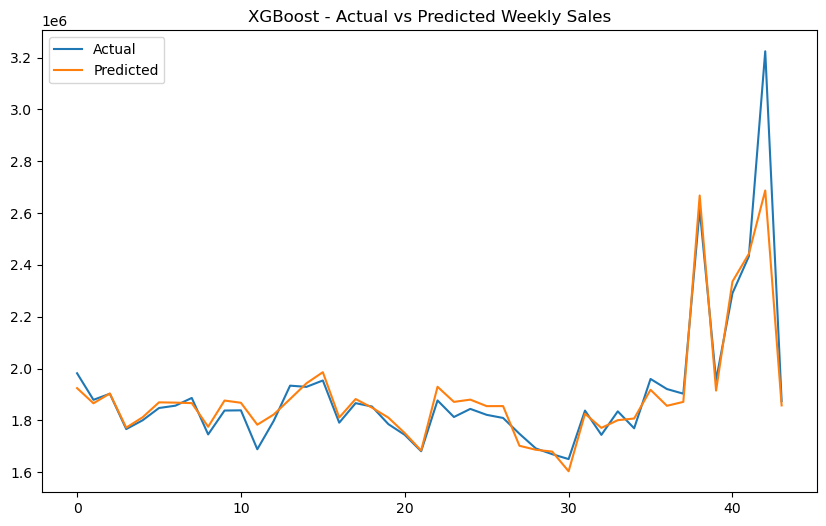

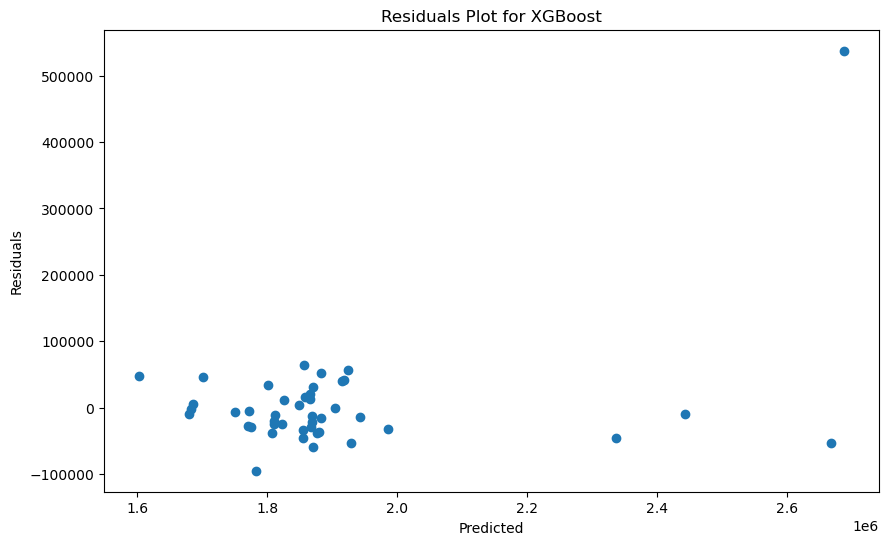

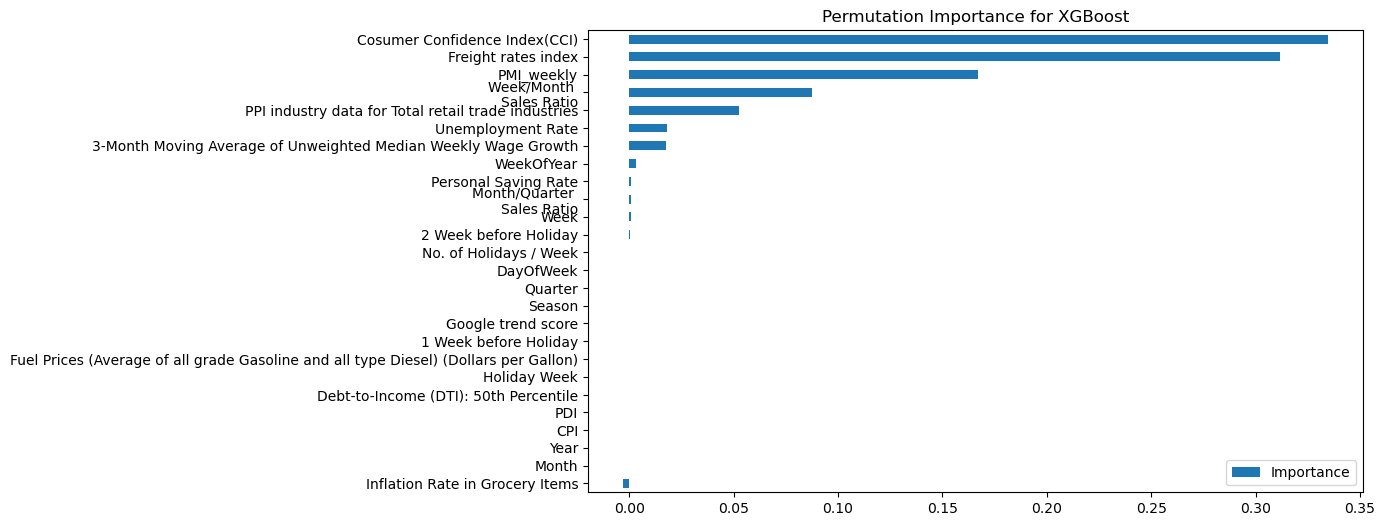

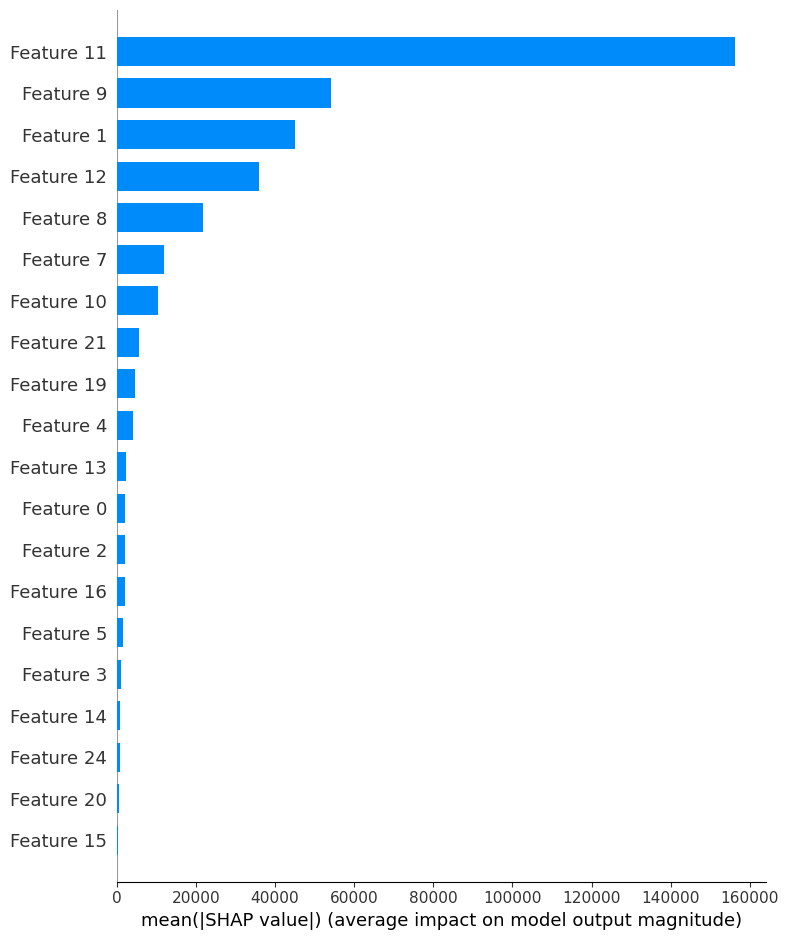

Text(0.5, 1.0, 'SHAP Feature Importance for XGBoost')

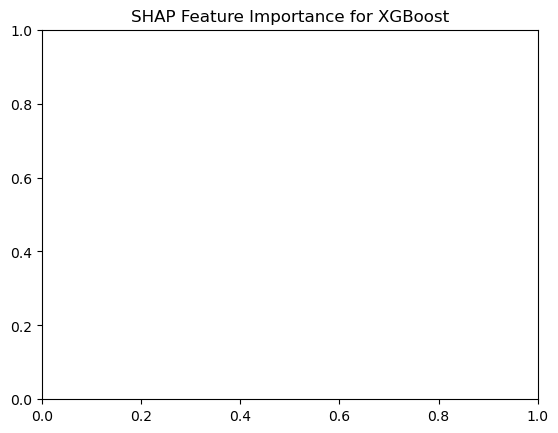

In [22]:
# XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}, MAPE: {mape_xgb}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.title("XGBoost - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_xgb = y_test.values - y_pred_xgb
plt.figure(figsize=(10,6))
plt.scatter(y_pred_xgb, residuals_xgb)
plt.title("Residuals Plot for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Feature Importance: Permutation Importance
perm_importance_xgb = permutation_importance(xgb_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df_xgb = pd.DataFrame(perm_importance_xgb.importances_mean, index=X.columns, columns=["Importance"])
importance_df_xgb.sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Permutation Importance for XGBoost')
plt.show()

# Get the top feature from permutation importance
top_feature = importance_df_xgb.sort_values(by='Importance', ascending=False).index[0]

# SHAP analysis for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled)
shap.summary_plot(shap_values_xgb, X_test_scaled, plot_type="bar")
plt.title('SHAP Feature Importance for XGBoost')




# Random Forest

Random Forest - MAE: 44918.421970454714, RMSE: 67072.22942313542, MAPE: 0.022113049154888504


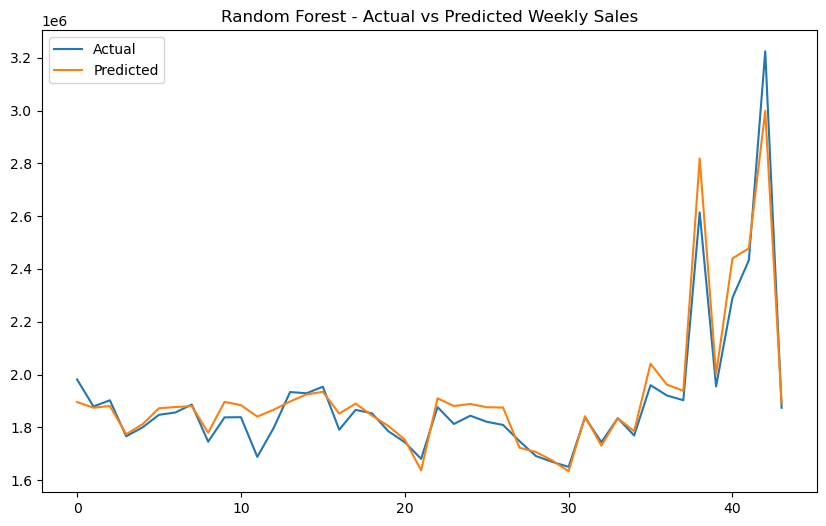

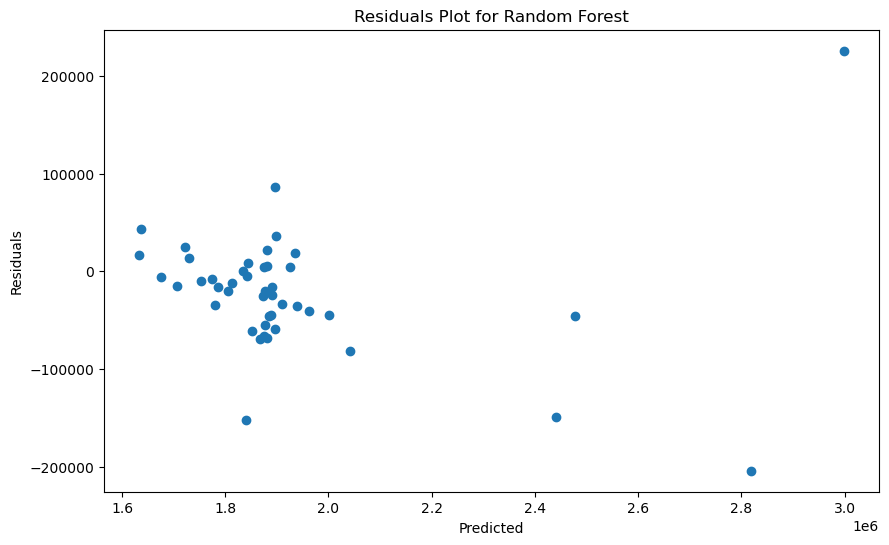

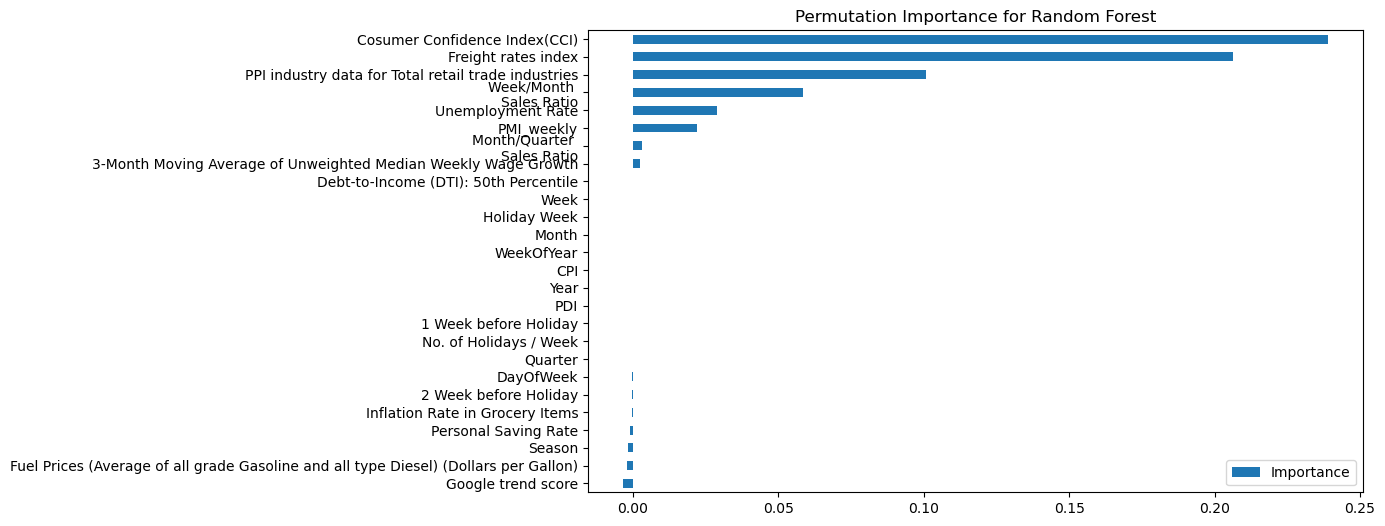

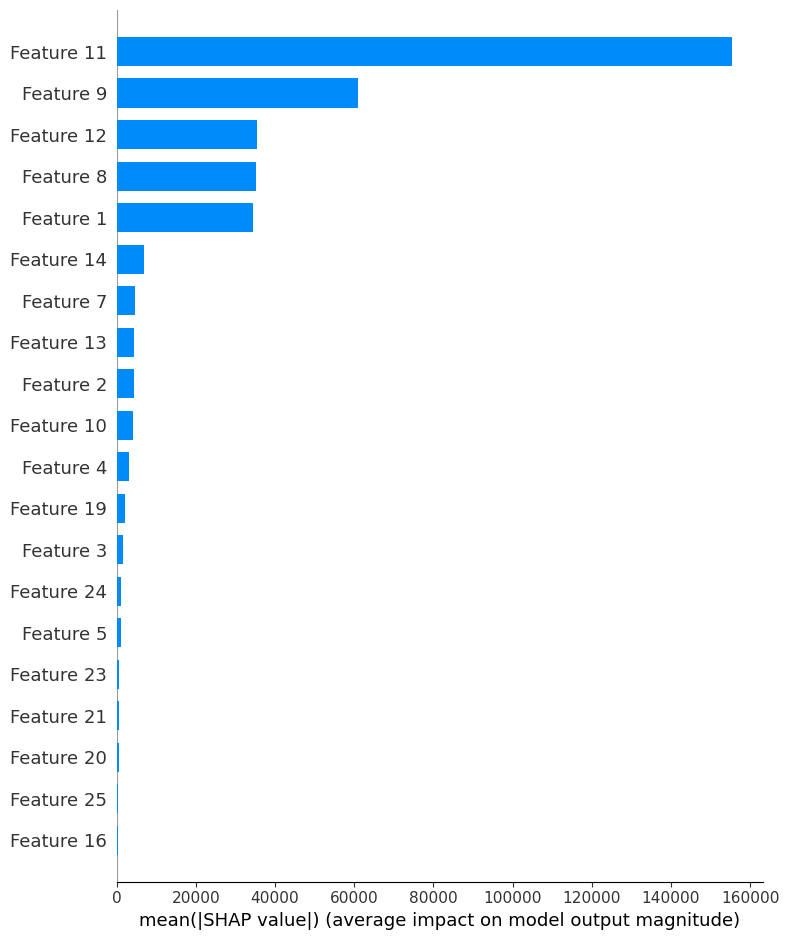

Text(0.5, 1.0, 'SHAP Feature Importance for Random Forest')

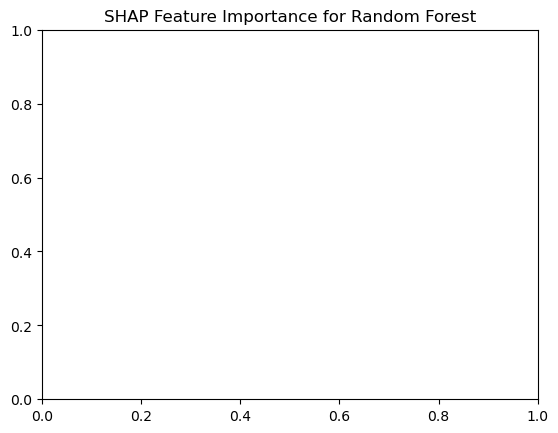

In [24]:
# Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, MAPE: {mape_rf}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.title("Random Forest - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_rf = y_test.values - y_pred_rf
plt.figure(figsize=(10,6))
plt.scatter(y_pred_rf, residuals_rf)
plt.title("Residuals Plot for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Feature Importance: Permutation Importance
perm_importance_rf = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df_rf = pd.DataFrame(perm_importance_rf.importances_mean, index=X.columns, columns=["Importance"])
importance_df_rf.sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Permutation Importance for Random Forest')
plt.show()



# SHAP analysis for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_scaled)
shap.summary_plot(shap_values_rf, X_test_scaled, plot_type="bar")
plt.title('SHAP Feature Importance for Random Forest')



# Support Vector Machine (SVM)

SVM - MAE: 276581.8405769547, RMSE: 386235.62764281966, MAPE: 0.13311154333695202


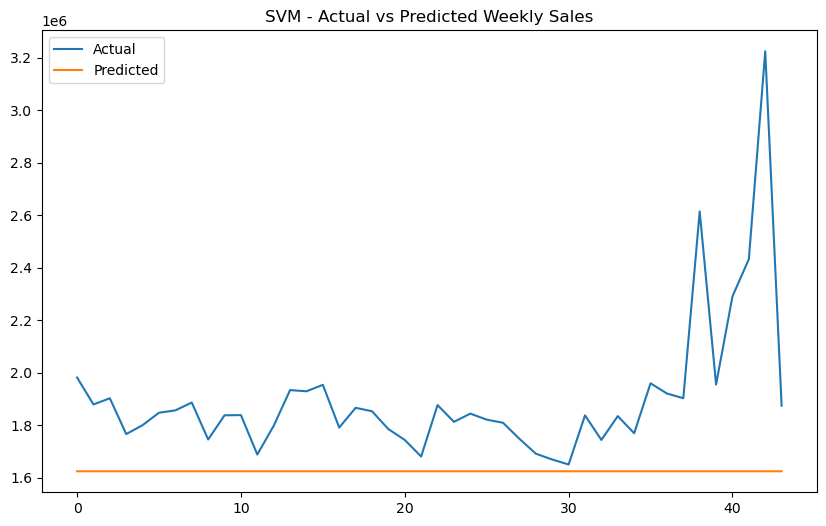

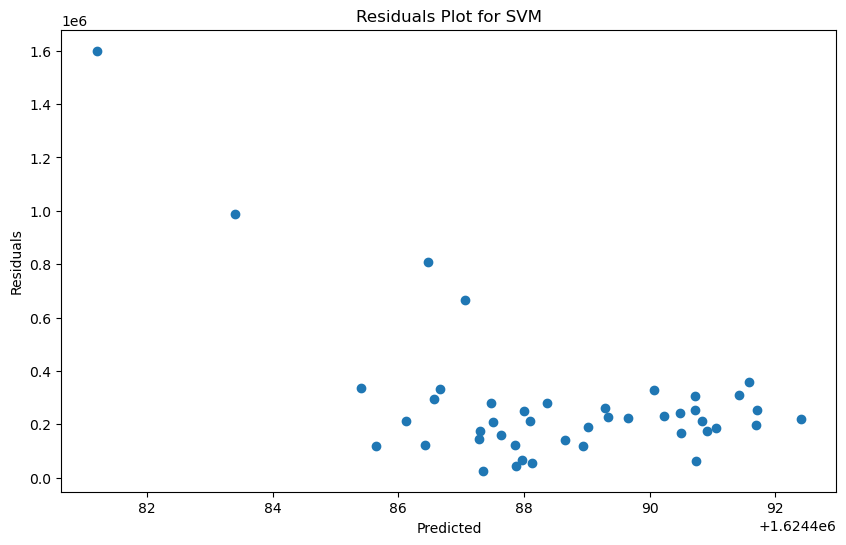

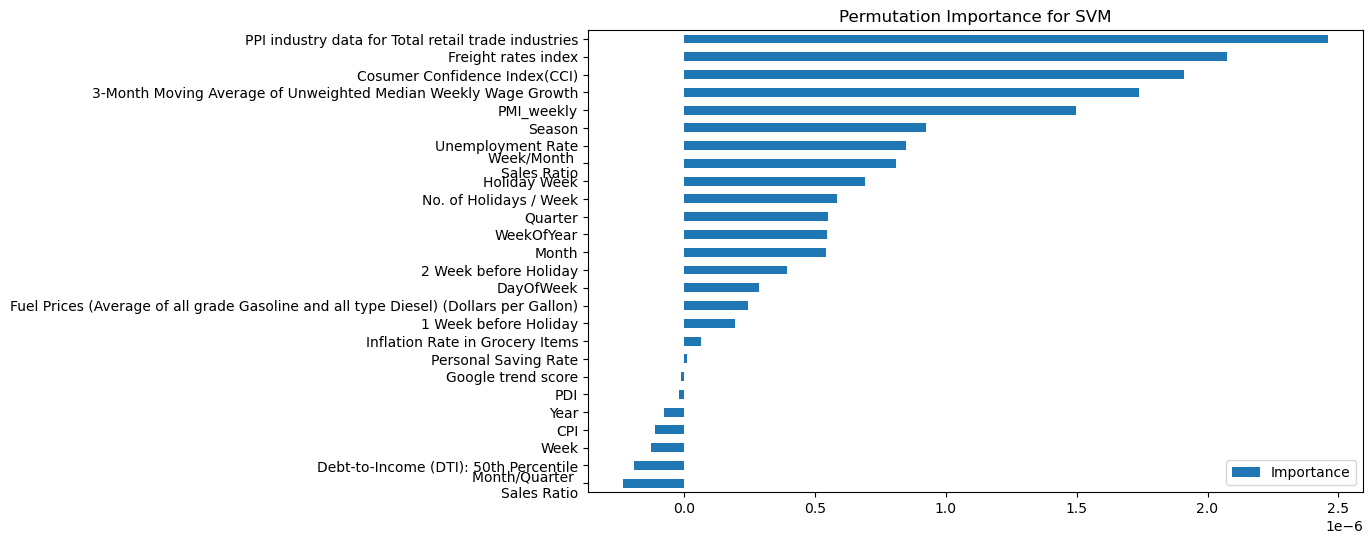

ValueError: Feature 'CPI' not in feature_names

In [30]:
# SVM model
svm_model = SVR()

# Fit the model
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)
print(f"SVM - MAE: {mae_svm}, RMSE: {rmse_svm}, MAPE: {mape_svm}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_svm, label='Predicted')
plt.title("SVM - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_svm = y_test.values - y_pred_svm
plt.figure(figsize=(10,6))
plt.scatter(y_pred_svm, residuals_svm)
plt.title("Residuals Plot for SVM")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Feature Importance: Permutation Importance
perm_importance_svm = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df_svm = pd.DataFrame(perm_importance_svm.importances_mean, index=X.columns, columns=["Importance"])
importance_df_svm.sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Permutation Importance for SVM')
plt.show()

# PDP for 'CPI'
PartialDependenceDisplay.from_estimator(svm_model, X_test_scaled, ['CPI'])
plt.suptitle('Partial Dependence Plot for CPI in SVM')
plt.show()

# SHAP analysis for SVM
# Since SHAP works best with tree-based models, SHAP analysis might not be optimal for SVM.
# We will skip SHAP analysis for SVM as it doesn't produce meaningful results in this case.

# ALE analysis for 'CPI'
ale_result_svm = ale_explainer(X_test_scaled, model=svm_model.predict, feature=['CPI'])
plt.figure(figsize=(10, 6))
plt.plot(ale_result_svm['ale_values'])
plt.xlabel('CPI')
plt.ylabel('ALE Effect')
plt.title('Accumulated Local Effects for CPI in SVM')
plt.show()


# K-Nearest Neighbors (KNN)

KNN - MAE: 89023.5659090909, RMSE: 129806.97713177062, MAPE: 0.04617799958465862


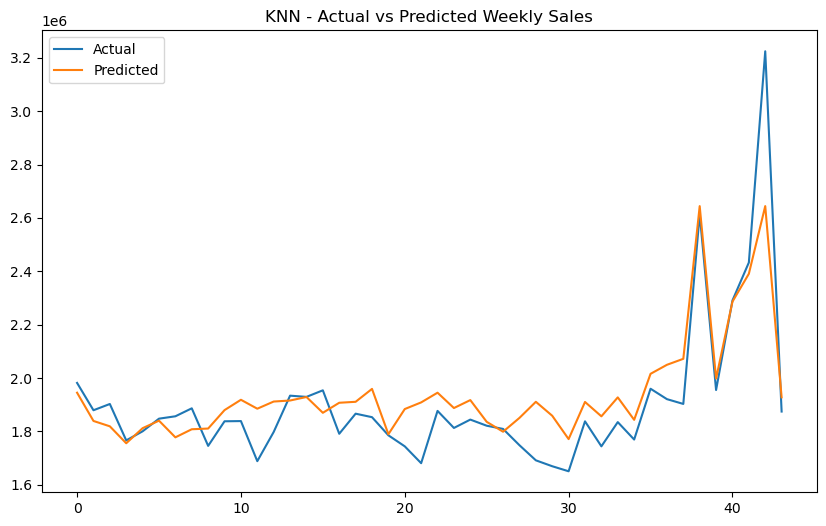

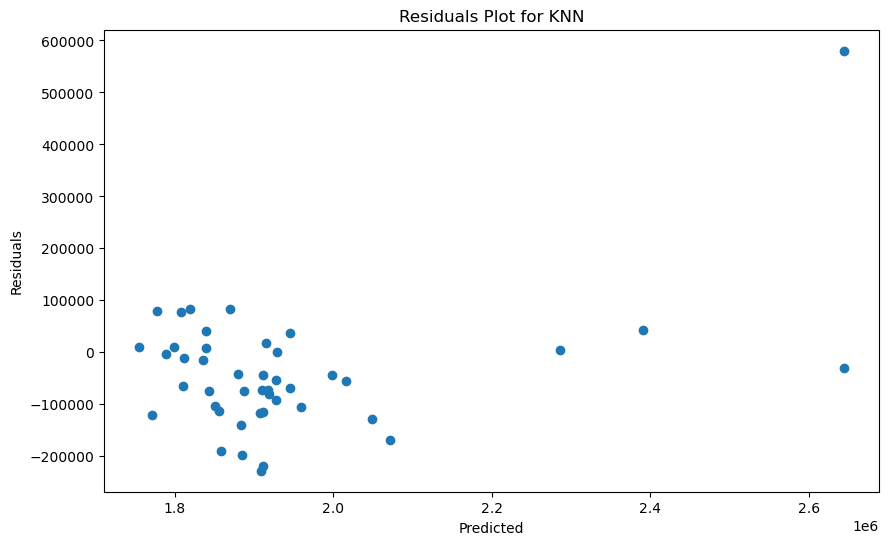

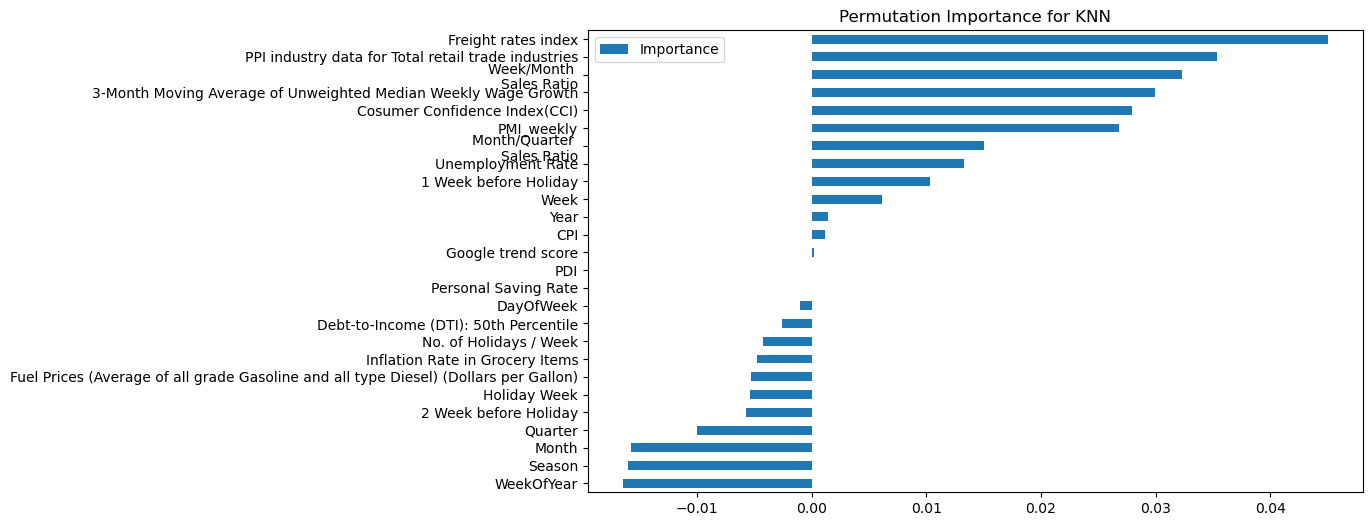

ValueError: Feature 'CPI' not in feature_names

In [33]:
# KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
print(f"KNN - MAE: {mae_knn}, RMSE: {rmse_knn}, MAPE: {mape_knn}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_knn, label='Predicted')
plt.title("KNN - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_knn = y_test.values - y_pred_knn
plt.figure(figsize=(10,6))
plt.scatter(y_pred_knn, residuals_knn)
plt.title("Residuals Plot for KNN")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Feature Importance: Permutation Importance
perm_importance_knn = permutation_importance(knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df_knn = pd.DataFrame(perm_importance_knn.importances_mean, index=X.columns, columns=["Importance"])
importance_df_knn.sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Permutation Importance for KNN')
plt.show()

# PDP for 'CPI'
PartialDependenceDisplay.from_estimator(knn_model, X_test_scaled, ['CPI'])
plt.suptitle('Partial Dependence Plot for CPI in KNN')
plt.show()

# SHAP analysis for KNN is not feasible due to the non-tree-based nature of the model.
# We'll skip SHAP for KNN.

# ALE analysis for 'CPI'
ale_result_knn = ale_explainer(X_test_scaled, model=knn_model.predict, feature=['CPI'])
plt.figure(figsize=(10, 6))
plt.plot(ale_result_knn['ale_values'])
plt.xlabel('CPI')
plt.ylabel('ALE Effect')
plt.title('Accumulated Local Effects for CPI in KNN')
plt.show()


# LSTM (Long Short-Term Memory)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LSTM - MAE: 1901001.3770693964, RMSE: 1920019.5764005645, MAPE: 0.999964318918538


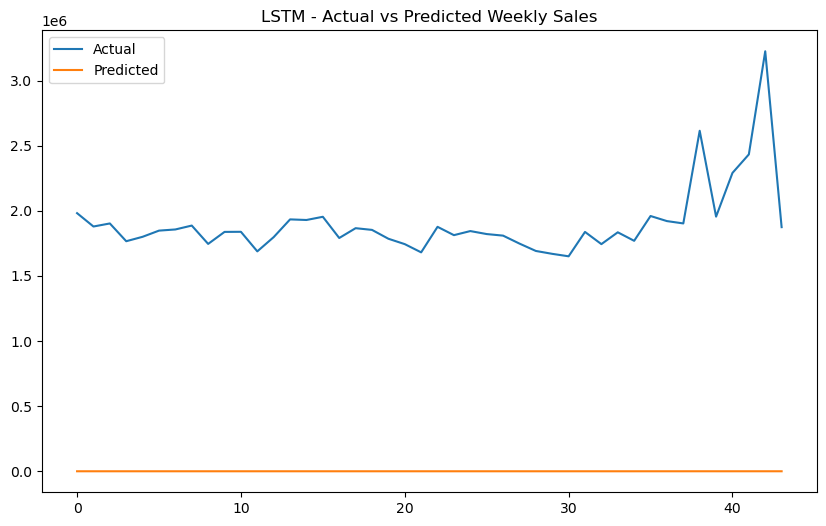

ValueError: x and y must be the same size

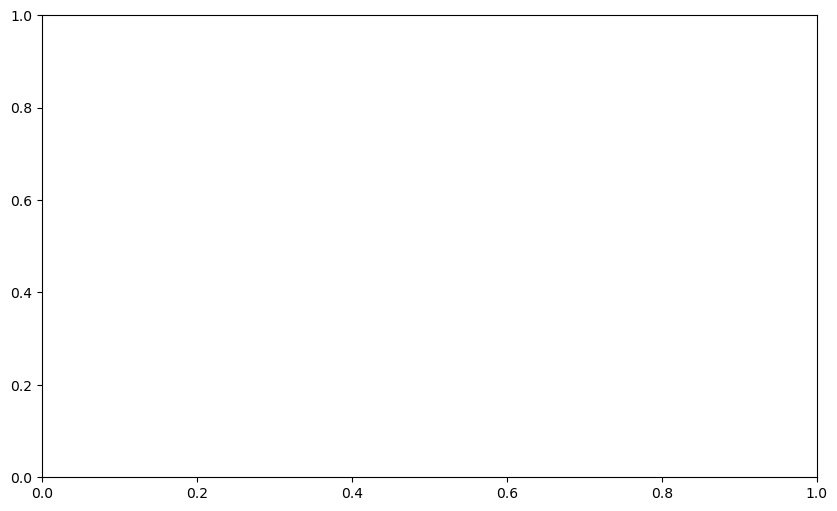

In [36]:
# Prepare data for LSTM (reshaping for LSTM input)
X_lstm_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_lstm_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Fit the model
lstm_model.fit(X_lstm_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate
y_pred_lstm = lstm_model.predict(X_lstm_test)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lstm, label='Predicted')
plt.title("LSTM - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_lstm = y_test.values - y_pred_lstm
plt.figure(figsize=(10,6))
plt.scatter(y_pred_lstm, residuals_lstm)
plt.title("Residuals Plot for LSTM")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# LSTM is not a tree-based model, so SHAP and Permutation Importance won't work optimally here.
# For LSTM, feature importance analysis like SHAP is not feasible.
# We'll skip SHAP for LSTM and Permutation Importance too.


# Temporal Convolutional Networks (TCN)

/opt/anaconda3/lib/python3.12/site-packages/tcn/tcn.py:227: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
TCN - MAE: 329807.2305681818, RMSE: 359163.53216944326, MAPE: 0.17135103904682267


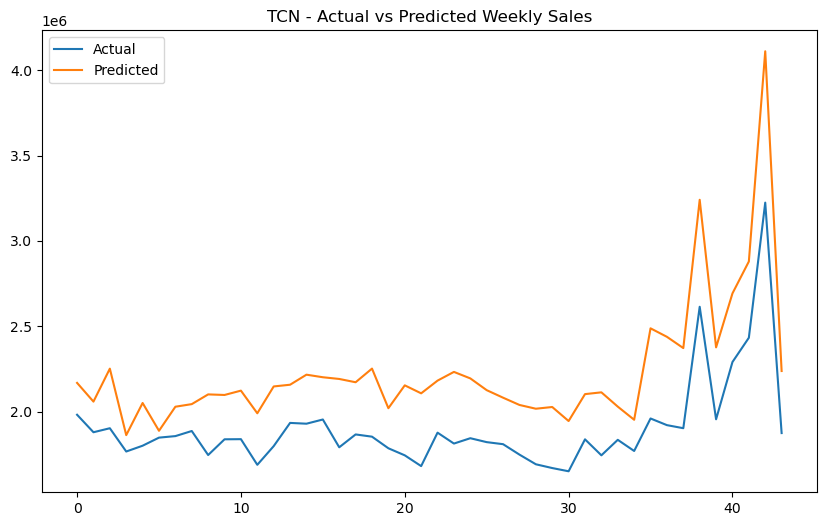

ValueError: x and y must be the same size

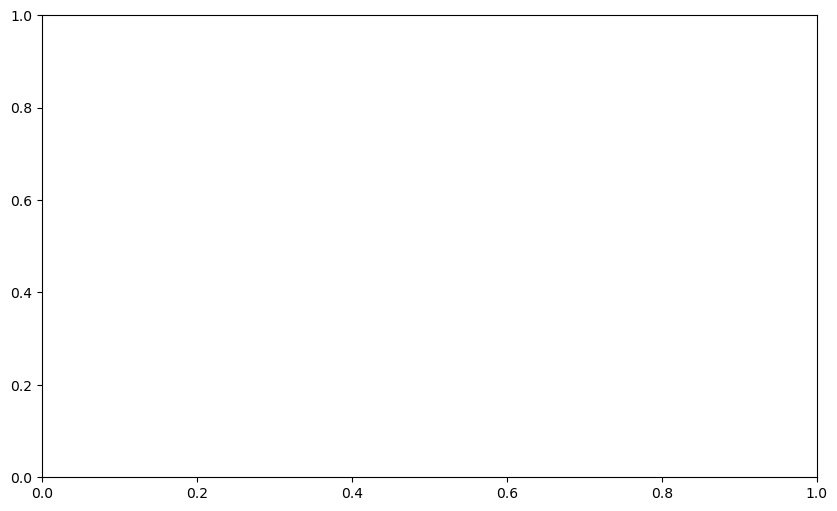

In [39]:
# Prepare data for TCN (reshaping for TCN input similar to LSTM)
X_tcn_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_tcn_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define TCN model
tcn_model = Sequential()
tcn_model.add(TCN(input_shape=(1, X_train_scaled.shape[1])))  # TCN expects 3D input [samples, timesteps, features]
tcn_model.add(Dense(1))
tcn_model.compile(optimizer='adam', loss='mse')

# Fit the model
tcn_model.fit(X_tcn_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict and evaluate
y_pred_tcn = tcn_model.predict(X_tcn_test)
mae_tcn = mean_absolute_error(y_test, y_pred_tcn)
rmse_tcn = np.sqrt(mean_squared_error(y_test, y_pred_tcn))
mape_tcn = mean_absolute_percentage_error(y_test, y_pred_tcn)
print(f"TCN - MAE: {mae_tcn}, RMSE: {rmse_tcn}, MAPE: {mape_tcn}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_tcn, label='Predicted')
plt.title("TCN - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot
residuals_tcn = y_test.values - y_pred_tcn
plt.figure(figsize=(10,6))
plt.scatter(y_pred_tcn, residuals_tcn)
plt.title("Residuals Plot for TCN")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# TCN is not a tree-based model, so SHAP and Permutation Importance won't work optimally here.
# We'll skip SHAP for TCN and Permutation Importance too.


## Stacking and Feature Importance for Stacked Model

Stacking Model - MAE: 105041.35188573318, RMSE: 125353.28179102798, MAPE: 0.05330539846860117


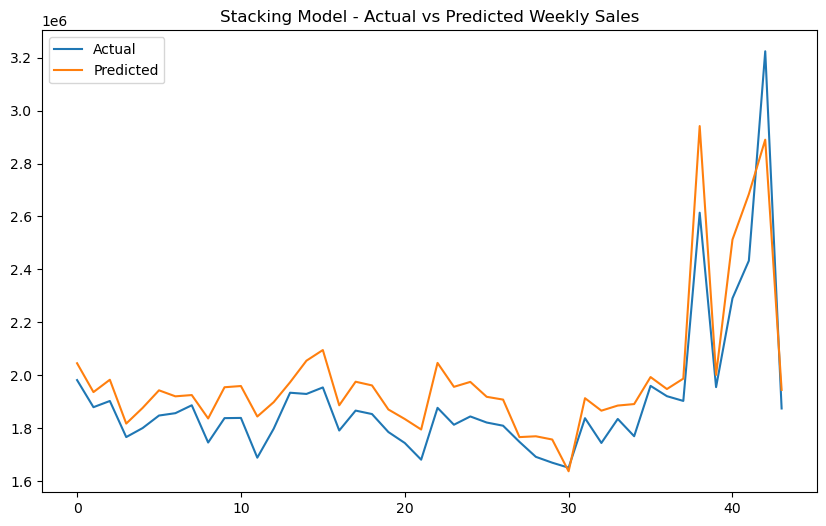

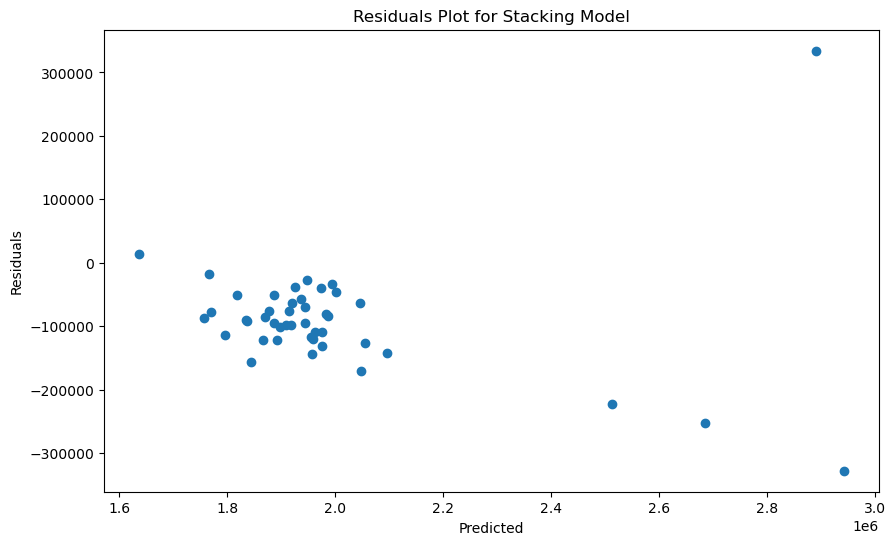

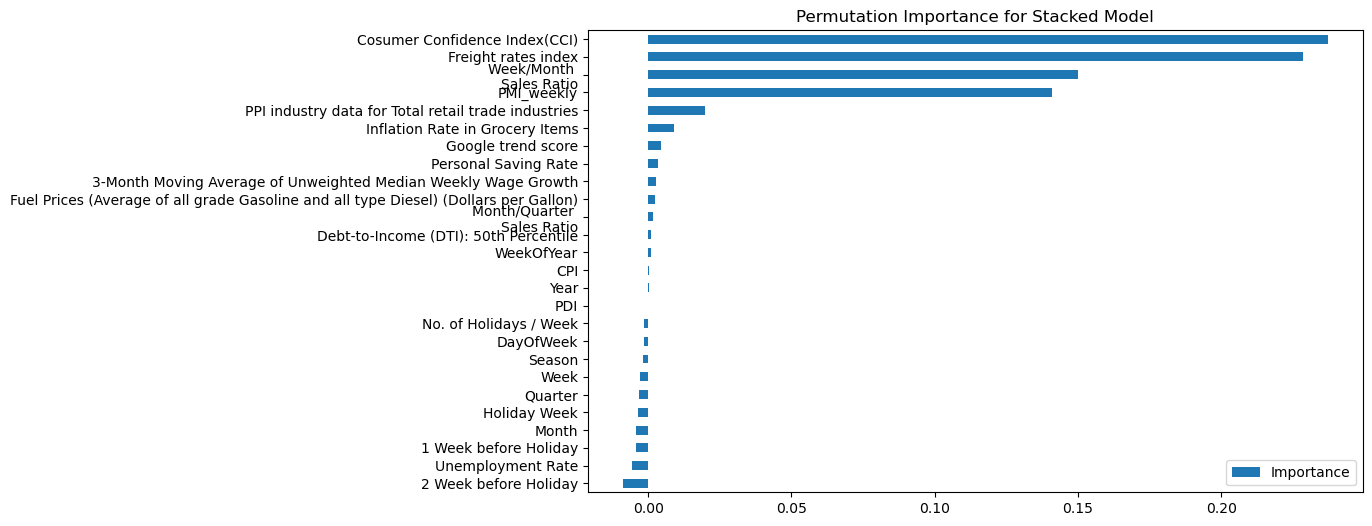

ValueError: Feature 'CPI' not in feature_names

In [42]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Combine the models using stacking
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacked model
stacking_model.fit(X_train_scaled, y_train)

# Predict and evaluate the stacked model
y_pred_stack = stacking_model.predict(X_test_scaled)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mape_stack = mean_absolute_percentage_error(y_test, y_pred_stack)
print(f"Stacking Model - MAE: {mae_stack}, RMSE: {rmse_stack}, MAPE: {mape_stack}")

# Visualize Actual vs Predicted for Stacked Model
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_stack, label='Predicted')
plt.title("Stacking Model - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

# Residuals Plot for Stacking Model
residuals_stack = y_test.values - y_pred_stack
plt.figure(figsize=(10,6))
plt.scatter(y_pred_stack, residuals_stack)
plt.title("Residuals Plot for Stacking Model")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Feature Importance: Permutation Importance for Stacked Model
perm_importance_stack = permutation_importance(stacking_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df_stack = pd.DataFrame(perm_importance_stack.importances_mean, index=X.columns, columns=["Importance"])
importance_df_stack.sort_values(by='Importance').plot(kind='barh', figsize=(10, 6))
plt.title('Permutation Importance for Stacked Model')
plt.show()

# PDP for 'CPI' (example feature)
PartialDependenceDisplay.from_estimator(stacking_model, X_test_scaled, ['CPI'])
plt.suptitle('Partial Dependence Plot for CPI in Stacking Model')
plt.show()

# SHAP analysis for Stacked Model
# SHAP is not directly available for stacking models as-is.
# We will use SHAP TreeExplainer for individual models, but for the stacking model, we'll skip SHAP.

# ALE analysis for 'CPI' in Stacked Model
ale_result_stack = ale_explainer(X_test_scaled, model=stacking_model.predict, feature=['CPI'])
plt.figure(figsize=(10, 6))
plt.plot(ale_result_stack['ale_values'])
plt.xlabel('CPI')
plt.ylabel('ALE Effect')
plt.title('Accumulated Local Effects for CPI in Stacking Model')
plt.show()



## Simulation: Impact of Percentage Change in Highly Correlated Variables
Now, we will simulate the impact of a percentage change in the top 2 highly correlated variables (based on feature importance from the stacked model).

a. Identify Top 2 Highly Correlated Variables
We will identify the top 2 features that have the most influence on weekly sales according to the Permutation Importance of the stacked model.

In [45]:
# Get the top 2 most important variables from Permutation Importance
top_2_variables = importance_df_stack.sort_values(by='Importance', ascending=False).head(2).index.tolist()
print(f"Top 2 Highly Correlated Variables: {top_2_variables}")


Top 2 Highly Correlated Variables: ['Cosumer Confidence Index(CCI)', 'Freight rates index']


# Ask for User Input for Percentage Change
We'll ask the user to input percentage changes for these top 2 variables.

In [48]:
# Ask for user input on percentage change for the top 2 variables
change_var_1 = float(input(f"Enter the percentage change for {top_2_variables[0]}: "))
change_var_2 = float(input(f"Enter the percentage change for {top_2_variables[1]}: "))

# Apply the percentage change to the test dataset
X_test_simulation = X_test.copy()
X_test_simulation[top_2_variables[0]] *= (1 + change_var_1 / 100)
X_test_simulation[top_2_variables[1]] *= (1 + change_var_2 / 100)

# Rescale the modified test dataset
X_test_simulation_scaled = scaler.transform(X_test_simulation)


Enter the percentage change for Cosumer Confidence Index(CCI):  10
Enter the percentage change for Freight rates index:  20


# Simulate the Impact on Weekly Sales
Now, we'll use the modified test dataset to predict how the weekly sales would change with the percentage change in the top 2 variables.

In [51]:
# Predict using the stacked model on the modified test dataset
y_pred_simulation = stacking_model.predict(X_test_simulation_scaled)

# Calculate the percentage change in weekly sales
percentage_change_sales = ((y_pred_simulation - y_pred_stack) / y_pred_stack) * 100

# Show the predicted percentage change in weekly sales
print(f"Predicted percentage change in weekly sales due to changes in {top_2_variables[0]} and {top_2_variables[1]}: {percentage_change_sales.mean():.2f}%")


Predicted percentage change in weekly sales due to changes in Cosumer Confidence Index(CCI) and Freight rates index: 3.92%
